Learning Trigonometric Functions
============================

In [1]:
%matplotlib notebook

from math import sin, cos, tan, pi
from pyautospec import FunctionMps

Sine function
-------------------

Use DMRG learning to model the `sin` function using words with *fixed* length 8.

In [2]:
# learn the sin function in the [0,2π] interval
sin_a = FunctionMps(sequence_length=8).fit(sin, x0=0.0, x1=2*pi, epochs=100, learn_rate=0.1)

sin_a

  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: min=0.00 avg=0.22 max=2.54
epoch   20: min=0.00 avg=0.05 max=0.54
epoch   30: min=0.00 avg=0.01 max=0.14
epoch   40: min=0.00 avg=0.00 max=0.05
epoch   50: min=0.00 avg=0.00 max=0.01
epoch   60: min=0.00 avg=0.00 max=0.00
epoch   70: min=0.00 avg=0.00 max=0.00
epoch   80: min=0.00 avg=0.00 max=0.00
epoch   90: min=0.00 avg=0.00 max=0.00
epoch  100: min=0.00 avg=0.00 max=0.00


  FunctionMps(N=8) <built-in function sin>: [0.00,6.28] → R

  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  8│
  └─┬─┘ └─┬─┘       └─┬─┘

  alphabet size:   2
       bond dim:   8 (max: 20)
        

<IPython.core.display.Javascript object>


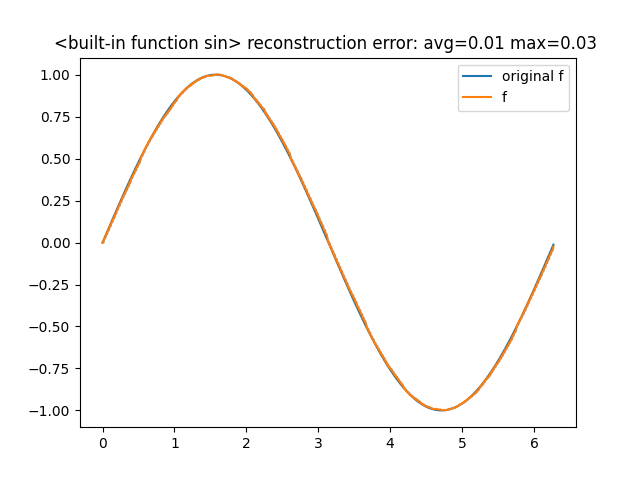

In [3]:
sin_a.comparison_chart(n_points=500)

The cosine function
----------------------------

In [4]:
# learn the cos function in the [0,2π] interval
cos_a = FunctionMps(sequence_length=8).fit(cos, x0=0.0, x1=2*pi, epochs=100, learn_rate=0.1)

cos_a

  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: min=0.00 avg=0.24 max=4.01
epoch   20: min=0.00 avg=0.06 max=1.03
epoch   30: min=0.00 avg=0.02 max=0.30
epoch   40: min=0.00 avg=0.00 max=0.08
epoch   50: min=0.00 avg=0.00 max=0.02
epoch   60: min=0.00 avg=0.00 max=0.01
epoch   70: min=0.00 avg=0.00 max=0.00
epoch   80: min=0.00 avg=0.00 max=0.00
epoch   90: min=0.00 avg=0.00 max=0.00
epoch  100: min=0.00 avg=0.00 max=0.00


  FunctionMps(N=8) <built-in function cos>: [0.00,6.28] → R

  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  8│
  └─┬─┘ └─┬─┘       └─┬─┘

  alphabet size:   2
       bond dim:   8 (max: 20)
        

<IPython.core.display.Javascript object>


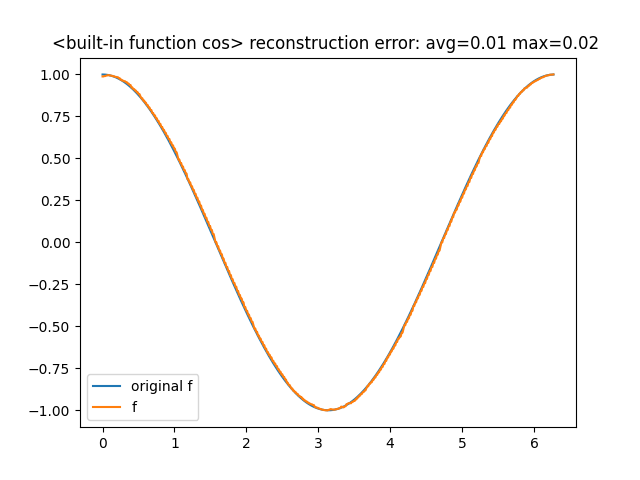

In [5]:
cos_a.comparison_chart(n_points=500)

The tangent function
------------------------------

To learn the `tan` function we need to stay away from the poles and use a larger state set

In [6]:
# learn the tan function in the (-π/2,+π/2) interval
d = 0.05
tan_a = FunctionMps(sequence_length=8).fit(tan, x0=-pi/2+d, x1=pi/2-d, epochs=100, learn_rate=0.1)

tan_a

  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: min=0.00 avg=3.33 max=157.47
epoch   20: min=0.00 avg=0.94 max=51.54
epoch   30: min=0.00 avg=0.22 max=11.14
epoch   40: min=0.00 avg=0.06 max=2.67
epoch   50: min=0.00 avg=0.02 max=1.06
epoch   60: min=0.00 avg=0.00 max=0.16
epoch   70: min=0.00 avg=0.00 max=0.04
epoch   80: min=0.00 avg=0.00 max=0.02
epoch   90: min=0.00 avg=0.00 max=0.01
epoch  100: min=0.00 avg=0.00 max=0.00


  FunctionMps(N=8) <built-in function tan>: [-1.52,1.52] → R

  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  8│
  └─┬─┘ └─┬─┘       └─┬─┘

  alphabet size:   2
       bond dim:   8 (max: 20)
        

<IPython.core.display.Javascript object>


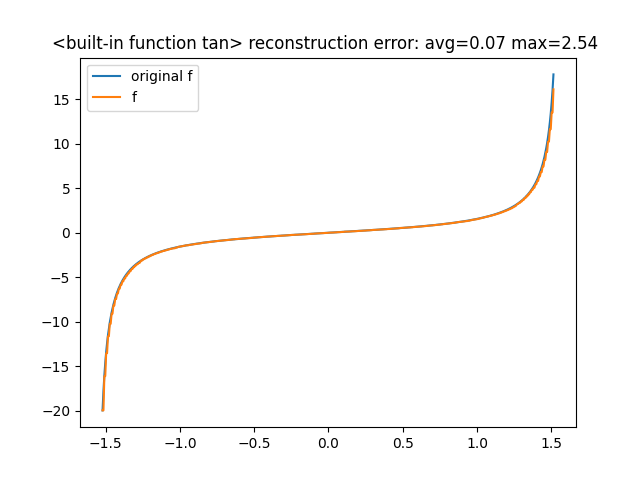

In [7]:
tan_a.comparison_chart(n_points=500)

it reproduces the original function pretty well.

Rapidly Varying
-----------------------

Let's try a more challenging example

In [8]:
def f(x):
    return cos(7*x)*sin(2*x*x - x)
    
f_a = FunctionMps(sequence_length=9).fit(f, x0=0, x1=2*pi, epochs=100, learn_rate=0.1)

f_a

  0%|          | 0/100 [00:00<?, ?it/s]

epoch   10: min=0.00 avg=0.09 max=0.89
epoch   20: min=0.00 avg=0.02 max=0.28
epoch   30: min=0.00 avg=0.01 max=0.10
epoch   40: min=0.00 avg=0.00 max=0.03
epoch   50: min=0.00 avg=0.00 max=0.01
epoch   60: min=0.00 avg=0.00 max=0.00
epoch   70: min=0.00 avg=0.00 max=0.00
epoch   80: min=0.00 avg=0.00 max=0.00
epoch   90: min=0.00 avg=0.00 max=0.00
epoch  100: min=0.00 avg=0.00 max=0.00


  FunctionMps(N=9) <function f at 0x64276c1d5120>: [0.00,6.28] → R

  ╭───┐ ╭───┐       ╭───┐
  │ 1 ├─┤ 2 ├─ ... ─┤  9│
  └─┬─┘ └─┬─┘       └─┬─┘

  alphabet size:   2
       bond dim:  16 (max: 20)
        

<IPython.core.display.Javascript object>


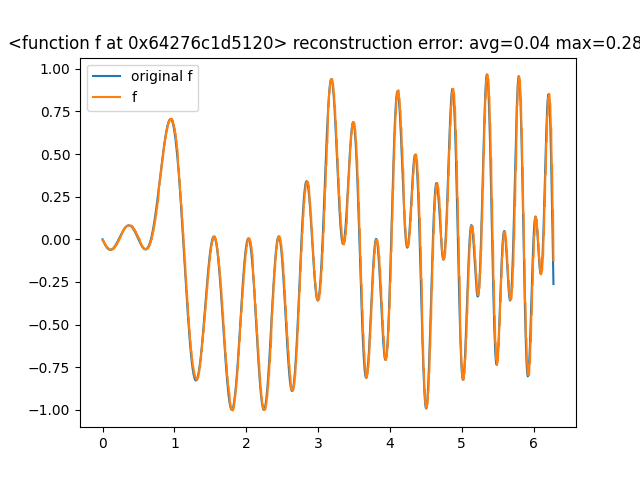

In [9]:
f_a.comparison_chart(n_points=1000)